In [117]:
import pandas as pd
import numpy as np
import gzip

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS


from datetime import datetime

import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import CountVectorizer

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import requests
from io import BytesIO

folder_path_base = './amazon-and-best-buy-electronics'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igorS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
df = pd.read_csv(f'{folder_path_base}/data/clean_review.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7078 entries, 0 to 7077
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   asins              7078 non-null   object 
 1   brand              7078 non-null   object 
 2   categories         7078 non-null   object 
 3   imageurls          7078 non-null   object 
 4   name               7078 non-null   object 
 5   primarycategories  7078 non-null   object 
 6   reviews_date       7078 non-null   object 
 7   reviews_rating     7078 non-null   float64
 8   reviews_text       7078 non-null   object 
 9   reviews_title      7074 non-null   object 
 10  reviews_username   7078 non-null   object 
 11  rating_class       7078 non-null   object 
 12  clean_text         7075 non-null   object 
dtypes: float64(1), object(12)
memory usage: 719.0+ KB


In [120]:
print(f'Número de brands no dataframe: {len(df.brand.unique())}')
print(df.brand.unique().tolist())

Número de brands no dataframe: 38
['Microsoft', 'Boytone', 'Sanus', 'Ultimate Ears', 'Lowepro', 'Corsair', 'Sdi Technologies, Inc.', 'Verizon Wireless', 'JVC', 'JBL', 'Lenovo', 'Siriusxm', 'Pny', 'Sling Media', 'Sony', 'Midland', 'Toshiba', 'Power Acoustik', 'House of Marley', 'Yamaha', 'DreamWave', 'Glengery', 'Dell', 'MEE audio', 'Samsung', 'Bose', 'Logitech', 'Motorola', 'Definitive Technology', 'Alpine', 'Belkin', 'Bowers & Wilkins', 'CLARITY-TELECOM', 'Kicker', 'SVS', 'WD', 'Netgear', 'Peerless-AV']


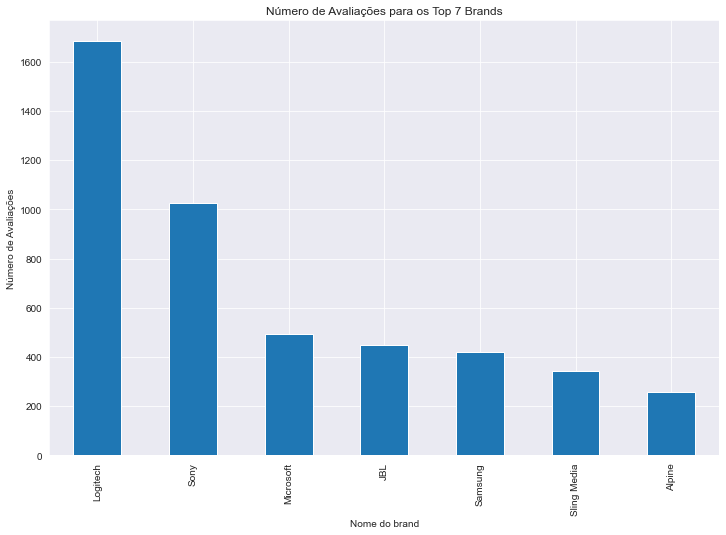

In [121]:
brands = df["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:7].plot(kind='bar')
plt.title("Número de Avaliações para os Top 7 Brands")
plt.xlabel('Nome do brand')
plt.ylabel('Número de Avaliações');

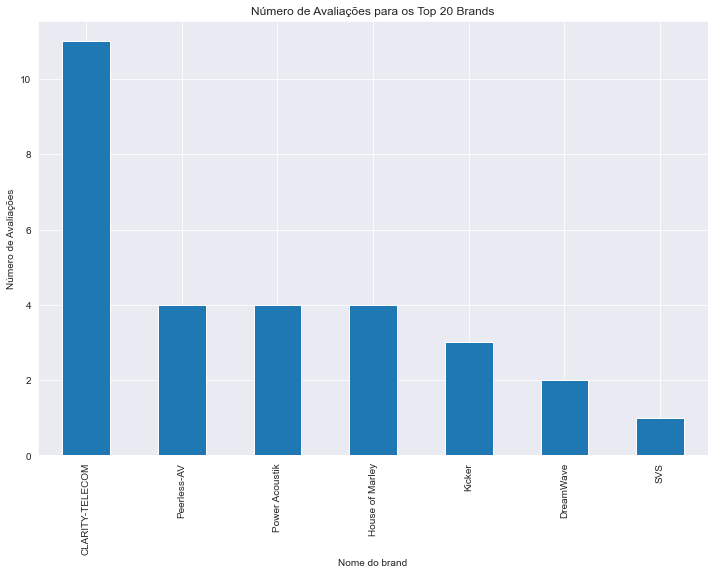

In [122]:
brands = df["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[-7:].plot(kind='bar')
plt.title("Número de Avaliações para os Top 20 Brands")
plt.xlabel('Nome do brand')
plt.ylabel('Número de Avaliações');

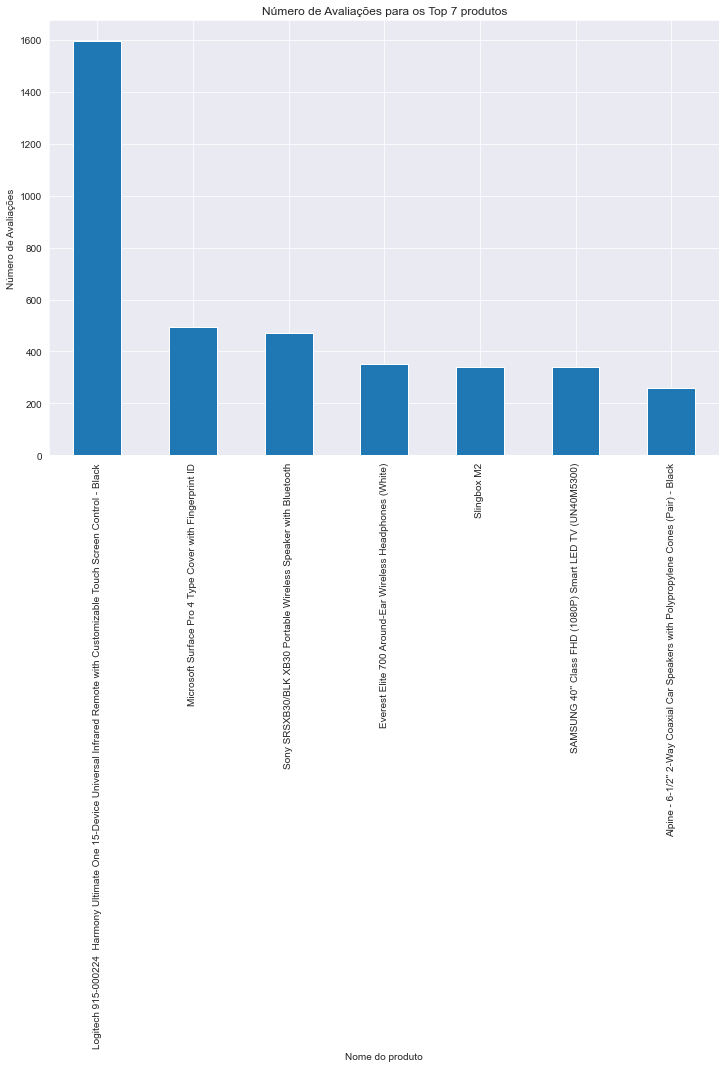

In [123]:
brands = df["name"].value_counts()
plt.figure(figsize=(12,8))
brands[:7].plot(kind='bar')
plt.title("Número de Avaliações para os Top 7 produtos")
plt.xlabel('Nome do produto')
plt.ylabel('Número de Avaliações');

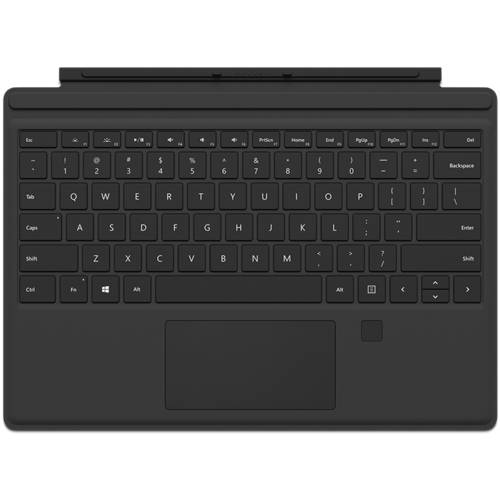

In [124]:
response = requests.get(df.imageurls.values[56])
img = Image.open(BytesIO(response.content))
img

In [125]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in df['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])

['must', 'accessory', 'surface', 'pro', 'computer']


In [126]:
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

10761


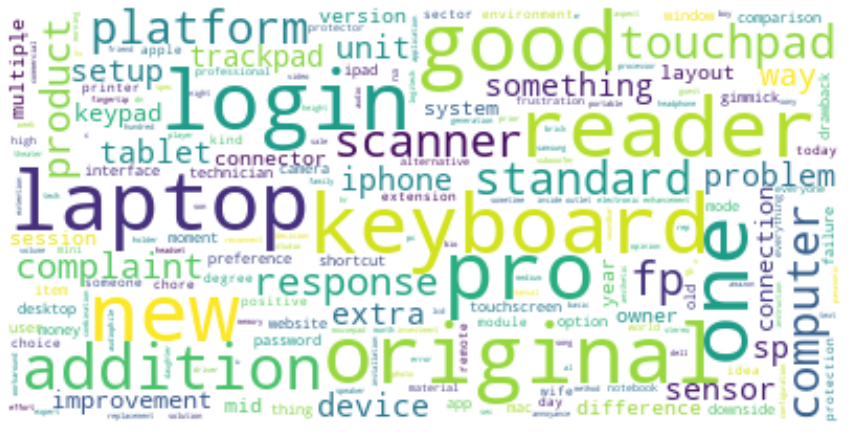

In [127]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Gerando a imagem com wordcloud
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
print(f"{len(all_words4)}")

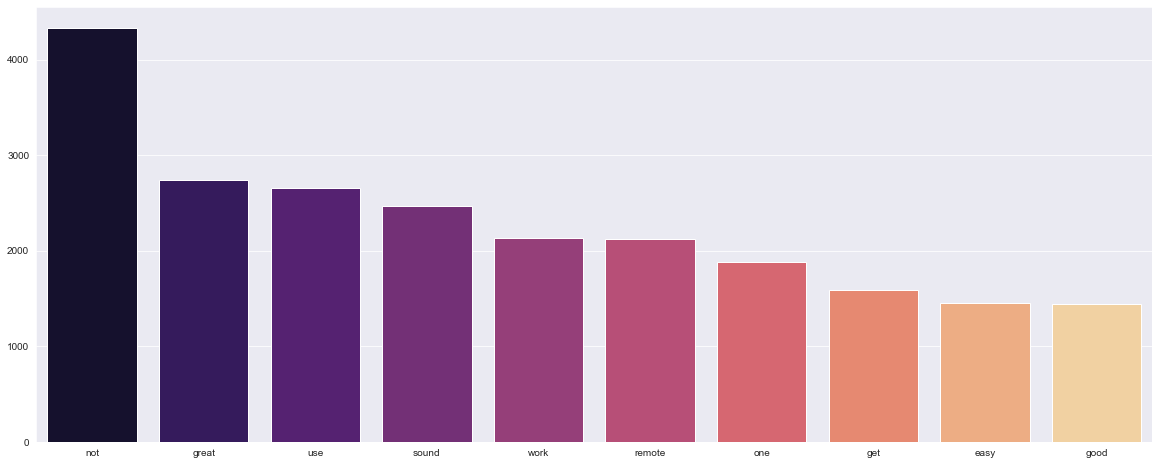

In [128]:

plt.figure(figsize = (20,8))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count, palette="magma");

Como podemos perceber a seguir, a maior parte das avaliações consta com nota 5, será que todos os reviews com nota 5 realmente condizem com a realidade? Ou seria apenas notas avaliada levianamente pois os sites de compra ficam enviando e-mails para avaliar o produto comprado?

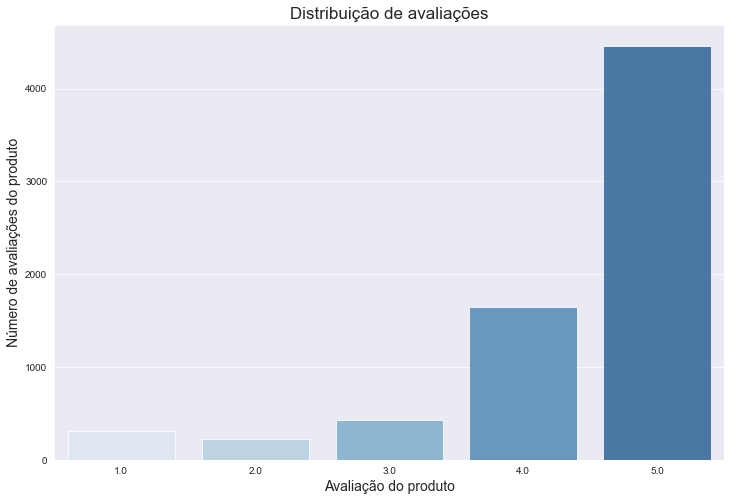

In [129]:
top = df['reviews_rating'].value_counts().index.tolist()
value = df['reviews_rating'].value_counts().values.tolist()

plt.figure(figsize=(12,8))
sns.barplot(top, value, alpha=0.8, palette="Blues")
plt.xlabel('Avaliação do produto', fontsize=14)
plt.ylabel('Número de avaliações do produto', fontsize=14)
plt.title('Distribuição de avaliações', fontsize=17)
plt.show()

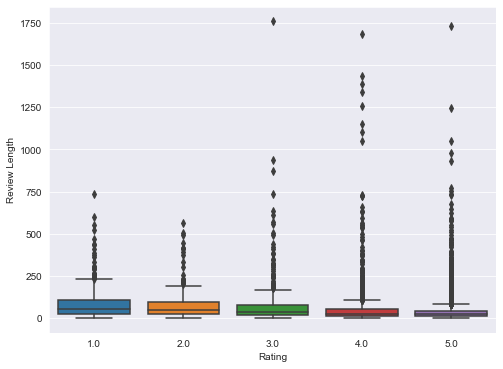

In [130]:
word_count=[]
for s1 in df.reviews_text:
    word_count.append(len(str(s1).split()))
    
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="reviews_rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

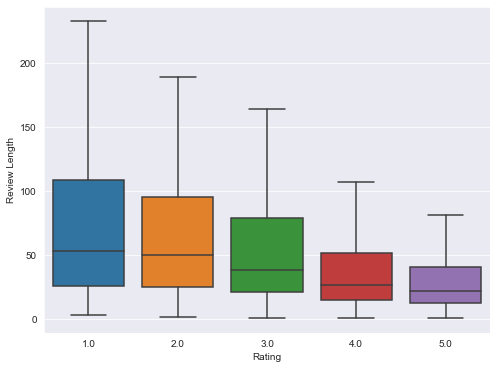

In [131]:
plt.figure(figsize = (8,6))

sns.boxplot(x="reviews_rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

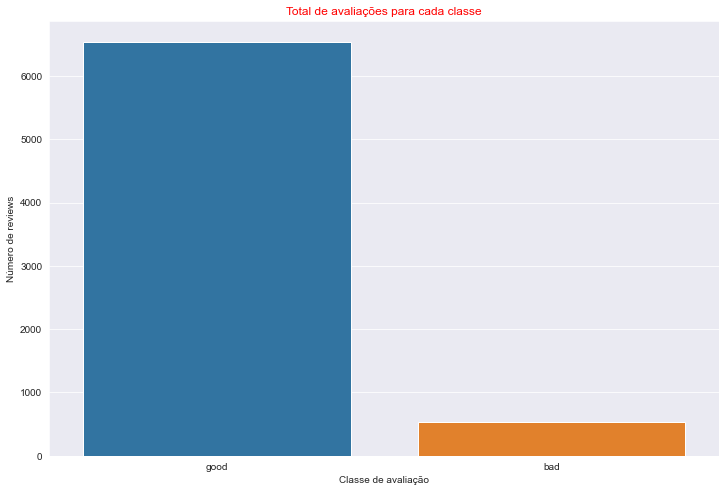

good    6542
bad      536
Name: rating_class, dtype: int64

In [132]:
plt.figure(figsize = (12,8))
sns.countplot(df['rating_class'])
plt.title('Total de avaliações para cada classe', color='r')
plt.xlabel('Classe de avaliação')
plt.ylabel('Número de reviews')
plt.show()

df['rating_class'].value_counts()

In [133]:
df['reviews_date'] = pd.to_datetime(df['reviews_date'])
df['year'] = df['reviews_date'].dt.year
df = df.drop('reviews_date', axis = 1)
df.head(3)

,asins,brand,categories,imageurls,name,primarycategories,reviews_rating,reviews_text,reviews_title,reviews_username,rating_class,clean_text,year
0,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",https://i5.walmartimages.com/asr/2a41f6f0-844e...,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,5.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,good,keyboard easy type fingerprint reader best fea...,2015
1,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",https://i5.walmartimages.com/asr/2a41f6f0-844e...,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,4.0,It's thin and light. I can type pretty easily ...,Nice,Appa,good,thin light type pretty easily,2015
2,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",https://i5.walmartimages.com/asr/2a41f6f0-844e...,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,4.0,I love the new design the keys are spaced well...,New,Kman,good,love new design key space well no mis type fin...,2015


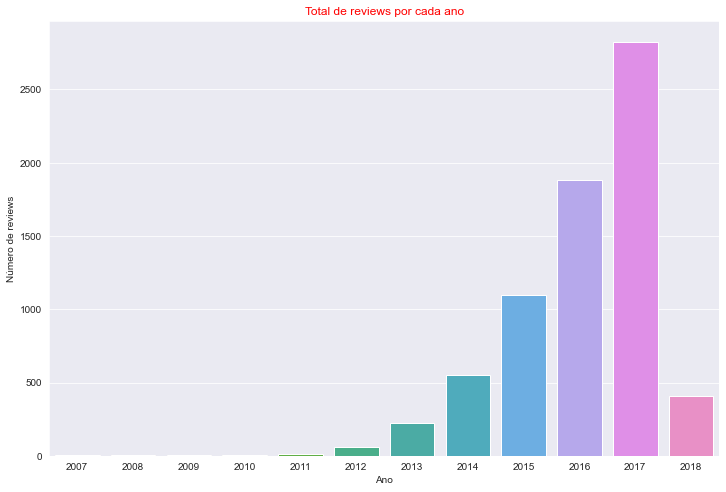

2017    2826
2016    1880
2015    1094
2014     554
2018     410
2013     224
2012      59
2011      13
2010       6
2009       5
2008       4
2007       3
Name: year, dtype: int64

In [134]:
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total de reviews por cada ano', color='r')
plt.xlabel('Ano')
plt.ylabel('Número de reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

Tendo em base o volume de vendas por ano, também podemos analisar se em qual ano tivemos mais entrada de novos clientes

In [135]:
print('Número de usuários únicos: {}'.format(len(df['reviews_username'].unique())))

Número de usuários únicos: 6379


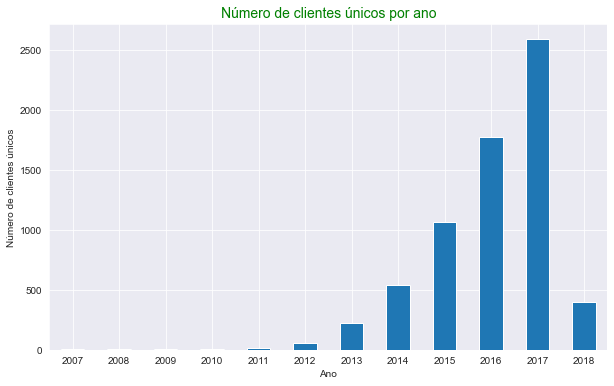

year
2007       3
2008       4
2009       5
2010       6
2011      13
2012      58
2013     222
2014     541
2015    1070
2016    1774
2017    2592
2018     399
Name: reviews_username, dtype: int64


In [136]:
unique_cust = df.groupby('year')['reviews_username'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0)
plt.title('Número de clientes únicos por ano', color='g', size = 14)
plt.xlabel('Ano')
plt.ylabel('Número de clientes únicos')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

<Figure size 864x576 with 0 Axes>

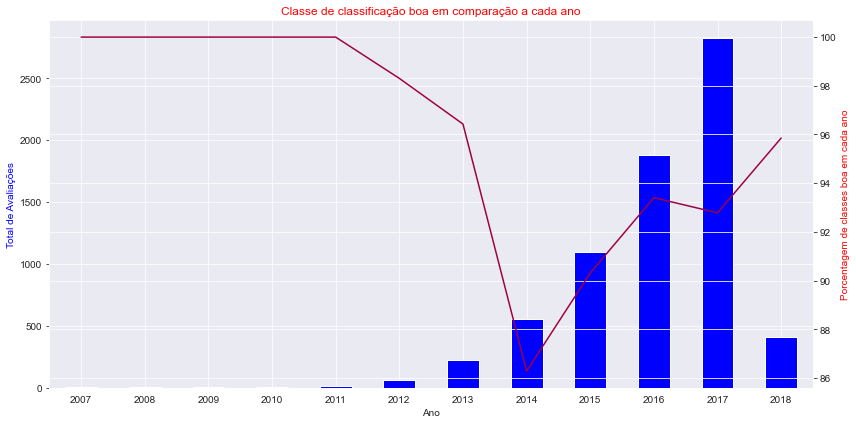

In [137]:
df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Classe de classificação boa em comparação a cada ano', color='r')
ax1.set_xlabel('Ano')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total de Avaliações")
ax2.set_ylabel("Porcentagem de classes boa em cada ano")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [138]:
df1 = df[["clean_text", "reviews_rating"]].reset_index()
df1.head(10)

,index,clean_text,reviews_rating
0,0,keyboard easy type fingerprint reader best fea...,5.0
1,1,thin light type pretty easily,4.0
2,2,love new design key space well no mis type fin...,4.0
3,3,attach easily firmly nice feel must surface pro,5.0
4,4,original keyboard okay not laptop feel bite fl...,5.0
5,5,purchase replace original surface pro keyboard...,5.0
6,6,find comfortable type rarely use fingerprint id,4.0
7,7,good keyboard addition surface pro platform de...,3.0
8,8,tough get work surface pro work bug love space...,4.0
9,9,quickly hassle free log surface finger print s...,5.0


In [139]:
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)

In [143]:
df1 = df1.loc[~df1.clean_text.isnull()]\

countVec.fit(df1["clean_text"])

CountVectorizer(binary=True, ngram_range=(1, 2))

In [144]:
transformed_matrix = countVec.transform(df1["clean_text"])
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [149]:
names = countVec.get_feature_names()
df2 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df2['rating'] = df1['reviews_rating']

In [151]:
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df2[df2[name]== 1]['rating'].mean()
        rating_count = df2[df2[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [152]:
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})
df_summary.head()

,feature_name,avg_rating,rating_count
0,aa,5.0,2
1,aa batteries,5.0,2
2,aaa,3.0,4
3,aaa batteries,3.0,1
4,aaa batteriesas,5.0,1


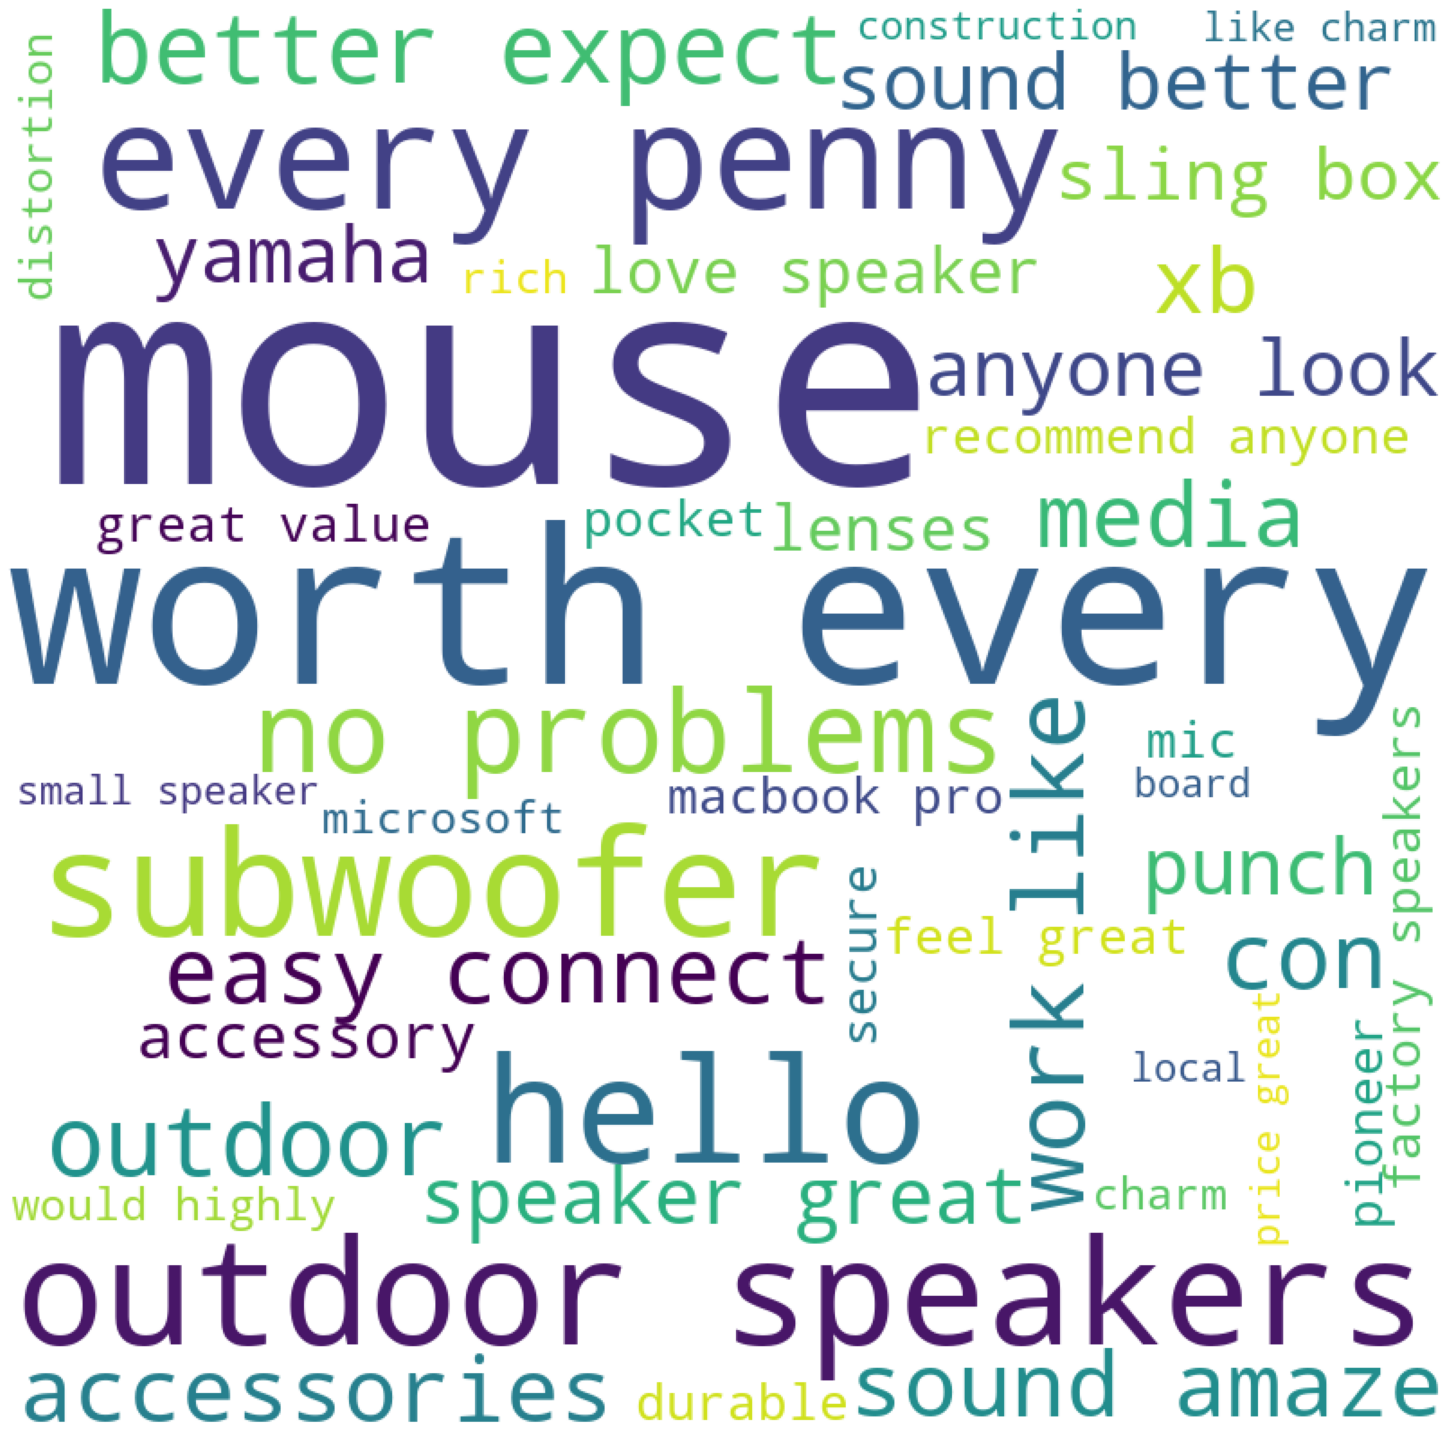

In [154]:
df_good = df_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_good.head(50)

wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_good)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

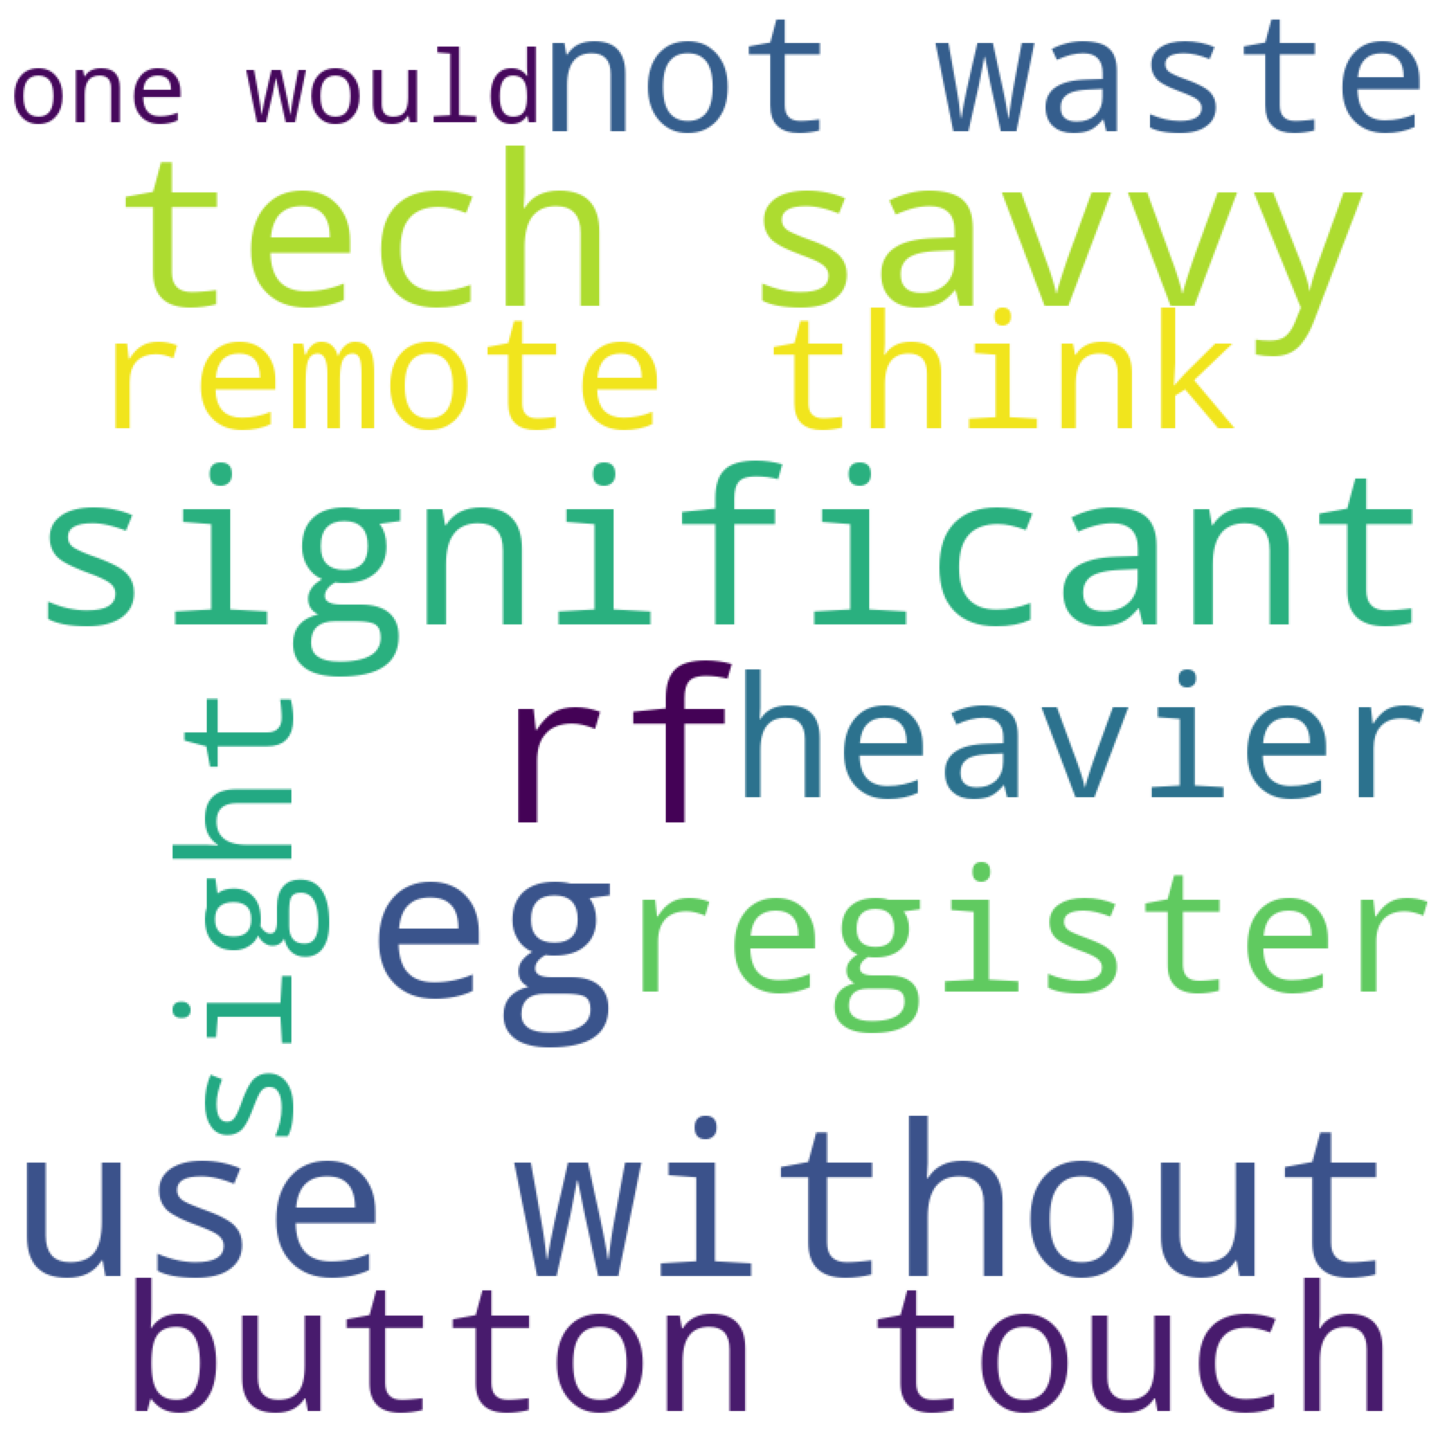

In [155]:
df_bad = df_summary.query("rating_count > 10").sort_values(by= 'avg_rating', ascending=True)[:12]
df_bad.sort_values(by=['avg_rating'],ascending=False,inplace=True)

wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_bad)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [156]:
df.to_csv(f'{folder_path_base}/data/cleaned_and_reduced_reviews.csv', sep=',', encoding = 'utf-8', index = False)